# <center>CROP RECOMMENDATION USING WEATHER AND SOIL CONTENT</center>
<center><img src= "https://media.nationalgeographic.org/assets/photos/120/983/091a0e2f-b93d-481b-9a60-db520c87ec33.jpg" alt ="Titanic" style='width:500px;'></center><br>

-  Machine Learning is well equipped when it comes to analyzing data regarding soil conditions, including moisture level, temperature, and chemical makeup, all of which have an impact upon crop growth and livestock well-being.<br>
-  Today in agriculture, this can allow crops to be grown at much higher precision, enabling farmers to treat plants and animals almost individually, which in turn significantly increases the effectiveness of farmers' decisions.<br>
-  Using this can develop means to even predict harvest yields and evaluate crop quality for individual plant species to detect crop disease and weed infestations which were previouly impossible!

## About Dataset

This dataset was build by augmenting datasets of rainfall, climate and fertilizer data available for India.

## Data fields

- N - ratio of Nitrogen content in soil

- P - ratio of Phosphorous content in soil

- K - ratio of Potassium content in soil

- temperature - temperature in degree Celsius

- humidity - relative humidity in %

- ph - ph value of the soil

- rainfall - rainfall in mm


## Why these ingredients are important ?

* N : Nitrogen is really important for plant growth (structure), plant food processing (metabolism), and the creation of chlorophyll. Without enough nitrogen in the plant, the plant cannot grow taller, or produce enough food (usually yellow).

* P : Phosphorus primary role in a plant is to store and transfer energy produced by photosynthesis for use in growth and reproductive processes. Soil P cycles in a variety forms in the soil.
* K : Potassium is an essential nutrient for plant growth.
* temperature : High temperatures affect plant growth in numerous ways. The most obvious are the effects of heat on photosynthesis, in which plants use carbon dioxide to produce oxygen, and respiration, an opposite process in which plants use oxygen to produce carbon dioxide.
* humidity : When conditions are too humid, it may promote the growth of mold and bacteria that cause plants to die and crops to fail, as well as conditions like root or crown rot. Humid conditions also invite the presence of pests, such as fungus gnats, whose larva feed on plant roots and thrive in moist soil.
* ph : Plant nutrients leach from the soil much faster at pH values below 5.5 than from soils within the 5.5 to 7.0 range. In some mineral soils aluminum can be dissolved at pH levels below 5.0 becoming toxic to plant growth. Soil pH may also affect the availability of plant nutrients.
* rainfall : Plants use the moisture in the soil to replenish the water lost through transpiration. If there is no water in the soil, the leaves will wilt. As more water is lost, the plant will fail and eventually die. Rainwater builds up the moisture levels in the soil and assures a healthy plant.

## Objective

The objective of this project is the user creates a forecasting model to suggest the most suitable crops to grow on a given farm based on various parameters.

# <div style="color:green;"><b> Let's get started then. !!! </b></div>

Firstly, we start by importing the libraries we will use.

In [1]:
import numpy as np 
import pandas as pd 
import missingno as msno

In [2]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

We continue by reading and analyzing our dataset...

In [3]:
df=pd.read_csv('Crop_recommendation.csv')
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [4]:
df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


# Exploratory Data Analysis

### Heatmap to check null/missing values

In [6]:
missing_values_count = df.isnull().sum()
#Let's see how many missing data we have
total_cells = np.product(df.shape)
total_missing = missing_values_count.sum()

#Let's look at the percentage (%) of missing data
(total_missing/total_cells) * 100

0.0

There is no missing values in our data set.

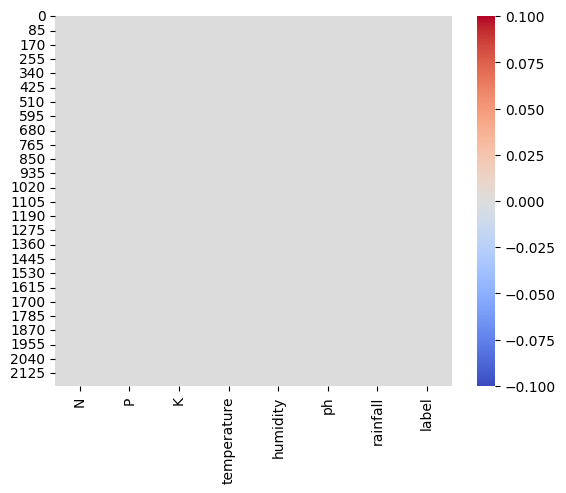

In [7]:
sns.heatmap(df.isnull(),cmap="coolwarm")
plt.show()

<u>Let's have a closer look at the distribution of temperature and ph.</u><br>
    
It is symmetrical and bell shaped, showing that trials will usually give a result near the average, but will occasionally deviate by large amounts. It's also fascinating how these two really resemble each other!</h4>

<AxesSubplot: xlabel='ph', ylabel='Density'>

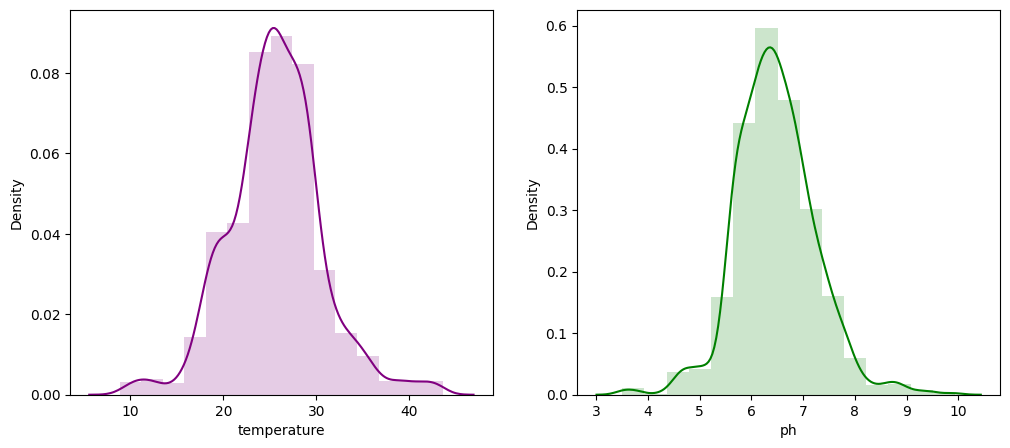

In [8]:
plt.figure(figsize=(12,5))
plt.subplot(1, 2, 1)
# sns.distplot(df_setosa['sepal_length'],kde=True,color='green',bins=20,hist_kws={'alpha':0.3})
sns.distplot(df['temperature'],color="purple",bins=15,hist_kws={'alpha':0.2})
plt.subplot(1, 2, 2)
sns.distplot(df['ph'],color="green",bins=15,hist_kws={'alpha':0.2})

<h4> A quick check if the dataset is balanced or not. If found imbalanced, we would have to downsample some targets which are more in quantity but so far everything looks good! <h4>

The graph is used to show the numerical value of categorical variables.

<AxesSubplot: xlabel='count', ylabel='label'>

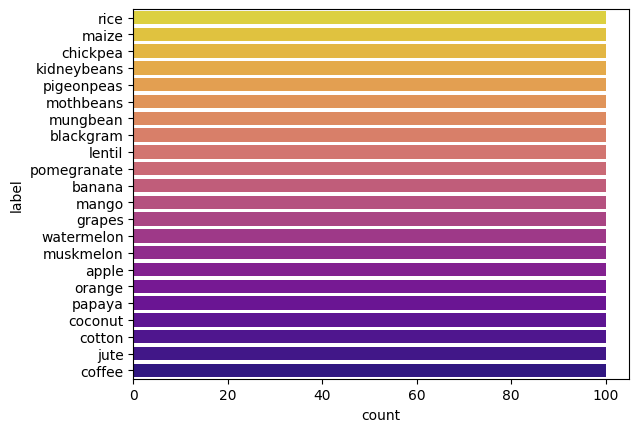

In [9]:
sns.countplot(y='label',data=df, palette="plasma_r")

A very important plot to visualize the diagonal distribution between two features for all the combinations! It is great to visualize how classes differ from each other in a particular space.

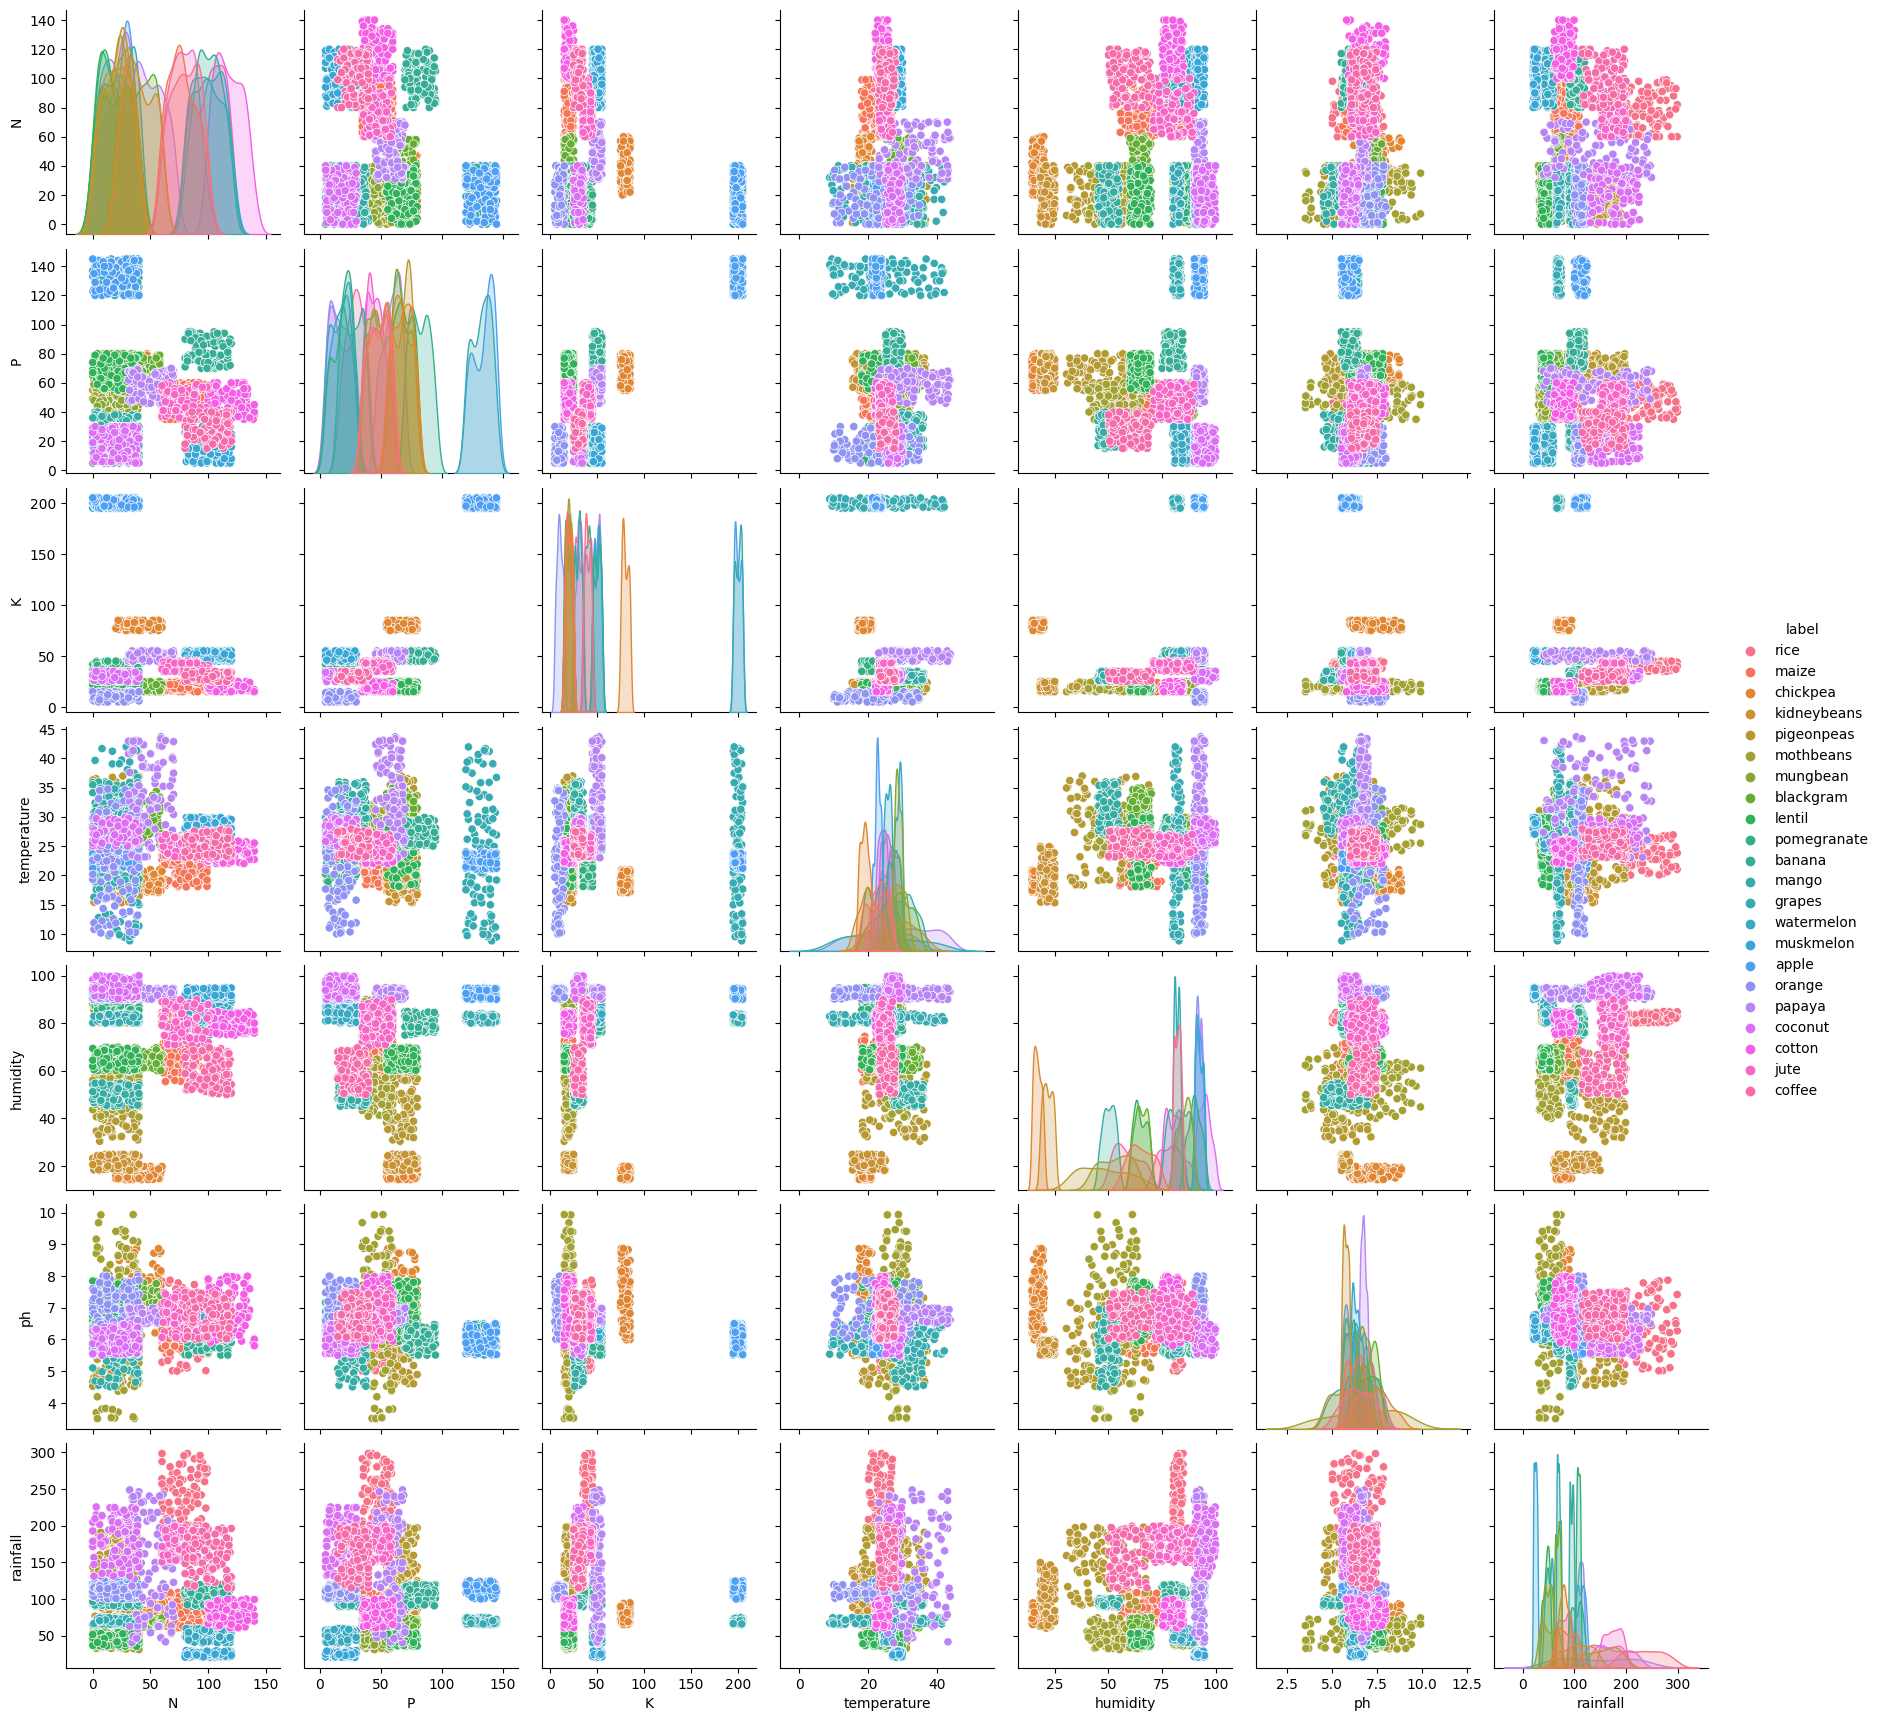

In [10]:
sns.pairplot(df, hue = 'label')

#### During rainy season, average rainfall is high (average 120 mm) and temperature is mildly chill (less than 30'C).

#### Rain affects soil moisture which affects ph of the soil. Here are the crops which are likely to be planted during this season. 

- <b> Rice needs heavy rainfall (>200 mm) and a humidity above 80%. No wonder major rice production in India comes from East Coasts which has average of 220 mm rainfall every year!
- <b> Coconut is a tropical crop and needs high humidity therefore explaining massive exports from coastal areas around the country.

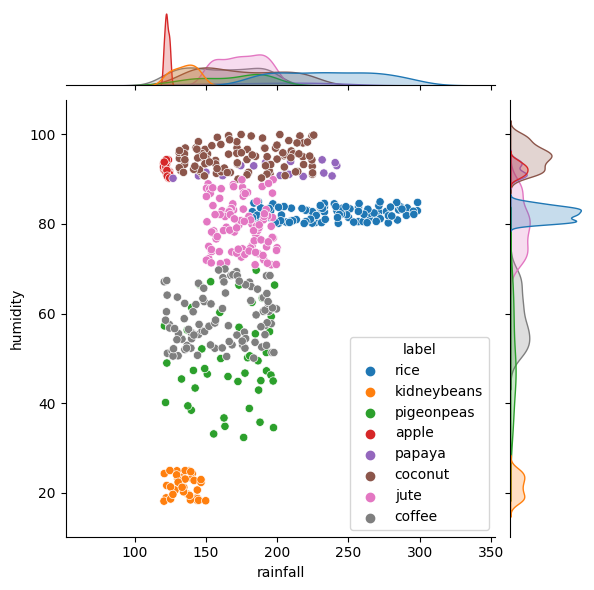

In [11]:
sns.jointplot(x="rainfall",y="humidity",data=df[(df['temperature']<30) & (df['rainfall']>120)],hue="label")

#### This graph correlates with average potassium (K) and average nitrogen (N) value (both>50). 
#### These soil ingredients direcly affects nutrition value of the food. Fruits which have high nutrients typically has consistent potassium values.

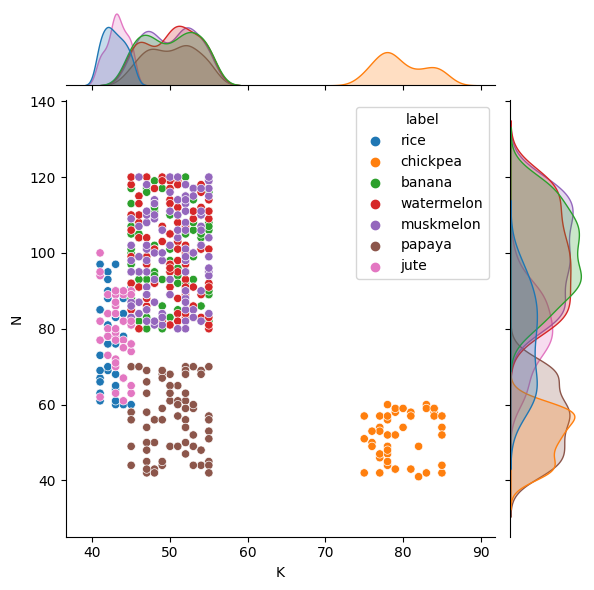

In [12]:
sns.jointplot(x="K",y="N",data=df[(df['N']>40)&(df['K']>40)],hue="label")

<h4>Let's try to plot a specfic case of pairplot between `humidity` and `K` (potassium levels in the soil.)</h4>

#### `sns.jointplot()` can be used for bivariate analysis to plot between humidity and K levels based on Label type. It further generates frequency distribution of classes with respect to features

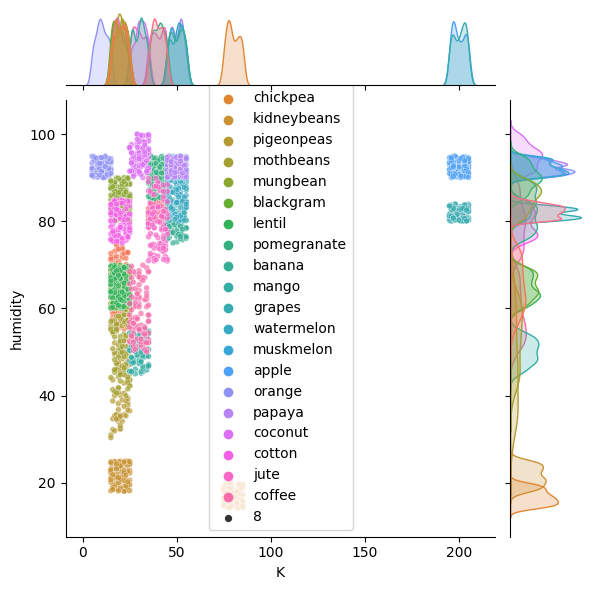

In [13]:
sns.jointplot(x="K",y="humidity",data=df,hue='label',size=8,s=30,alpha=0.7)

#### We can see ph values are critical when it comes to soil. A stability between 6 and 7 is preffered

<AxesSubplot: xlabel='ph', ylabel='label'>

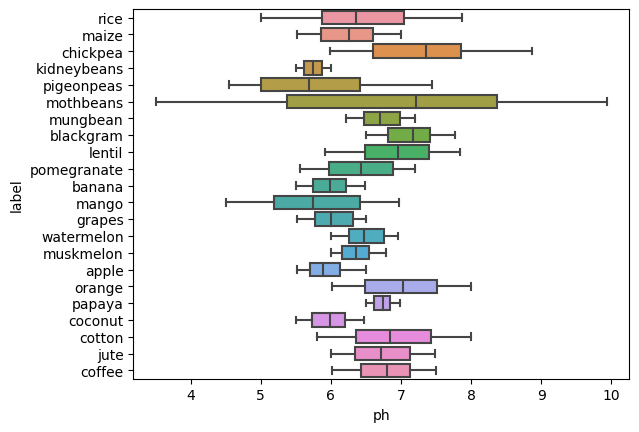

In [14]:
sns.boxplot(y='label',x='ph',data=df)

#### Another interesting analysis where Phosphorous levels are quite differentiable when it rains heavily (above 150 mm).

<AxesSubplot: xlabel='P', ylabel='label'>

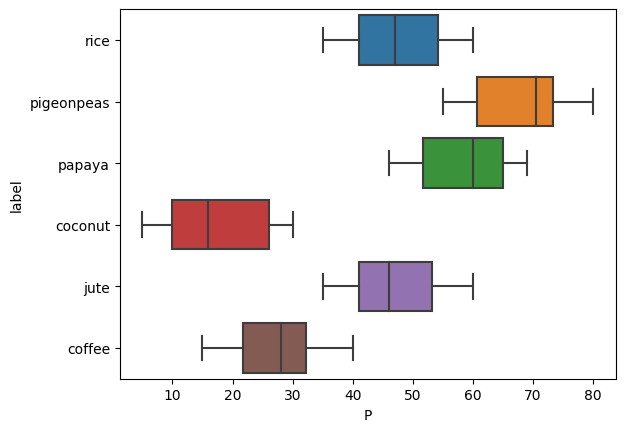

In [15]:
sns.boxplot(y='label',x='P',data=df[df['rainfall']>150])

#### Further analyzing phosphorous levels.

When humidity is less than 65, almost same phosphor levels(approx 14 to 25) are required for 6 crops which could be grown just based on the amount of rain expected over the next few weeks.

<AxesSubplot: xlabel='K', ylabel='rainfall'>

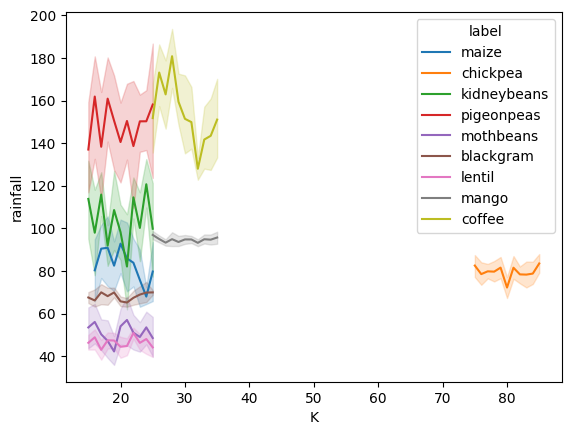

In [16]:
sns.lineplot(data = df[(df['humidity']<65)], x = "K", y = "rainfall",hue="label")

# DATA PRE-PROCESSING

### Let's make the data ready for machine learning model

In [17]:
c=df.label.astype('category')
targets = dict(enumerate(c.cat.categories))
df['target']=c.cat.codes

y=df.target
X=df[['N','P','K','temperature','humidity','ph','rainfall']]

**Correlation visualization between features. We can see how Phosphorous levels and Potassium levels are highly correlated.**

<AxesSubplot: >

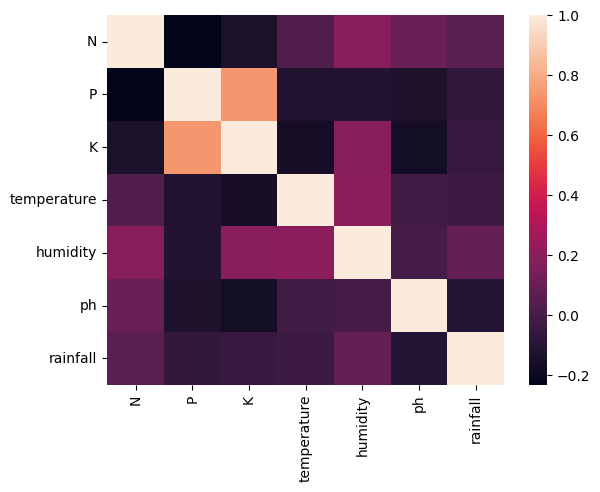

In [18]:
sns.heatmap(X.corr())

We can say that there is a positive correlation, which indicates a direct relationship between two features. This means that as Phosphorous levels increases, the other also increases, or as Potassium levels decreases, the other also decreases.

# FEATURE SCALING
**Feature scaling is required before creating training data and feeding it to the model.**

As we saw earlier, two of our features (temperature and ph) are gaussian distributed, therefore scaling them between 0 and 1 with MinMaxScaler.

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=1)

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)

# we must apply the scaling to the test set as well that we are computing for the training set
X_test_scaled = scaler.transform(X_test)

# MODEL SELECTION

## KNN Classifier for Crop prediction. 
<hr>

In [20]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train_scaled, y_train)
knn.score(X_test_scaled, y_test)

0.9781818181818182

In [21]:
#Comment added by Edanur to compare the best model performance
per_knn = knn.score(X_test_scaled, y_test) * 100

The output indicates that the KNN classifier performs with an accuracy of 97.82% on the test dataset, which is the ratio of correctly classified samples to the total number of examples in the test set.

### Confusion Matrix

<AxesSubplot: >

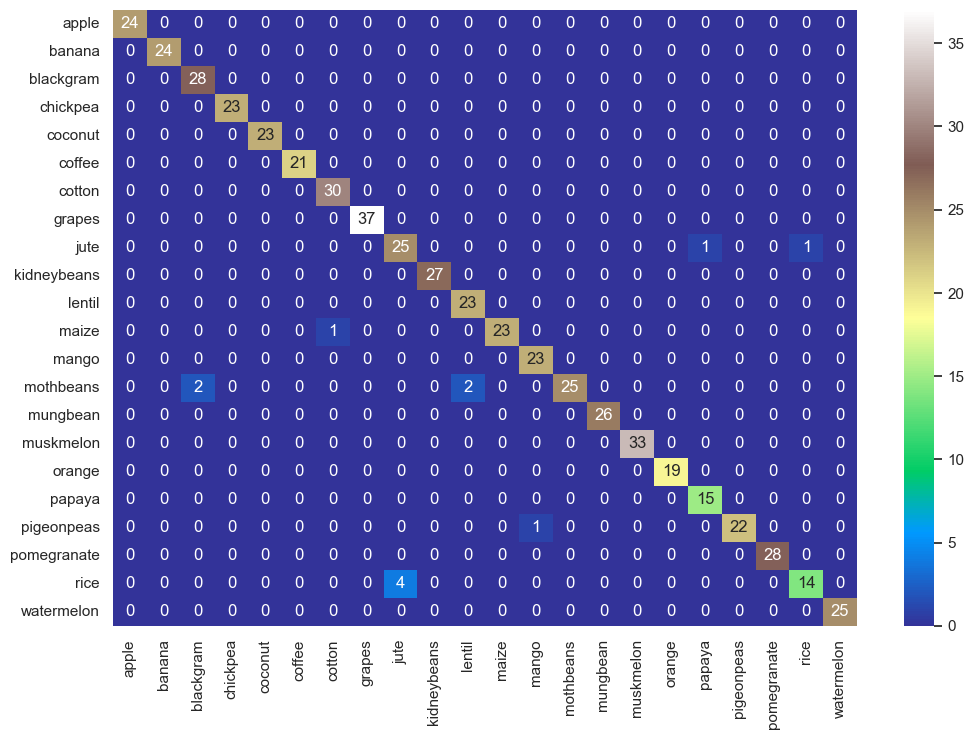

In [22]:
from sklearn.metrics import confusion_matrix
mat=confusion_matrix(y_test,knn.predict(X_test_scaled))
df_cm = pd.DataFrame(mat, list(targets.values()), list(targets.values()))
sns.set(font_scale=1.0) # for label size
plt.figure(figsize = (12,8))
sns.heatmap(df_cm, annot=True, annot_kws={"size": 12},cmap="terrain")

We can say that grapes had the most successful result here, meaning that all of them were predicted correctly.

For example, we can say that it made a total of 4 incorrect predictions for mothbeans. It was mistaken for blackgram twice and lentil twice, and we can say that it made 25 correct predictions.

# How can we increase KNN Classifier success?

### Hyperparameter Tuning

Let's try different values of n_neighbors to fine tune and get better results

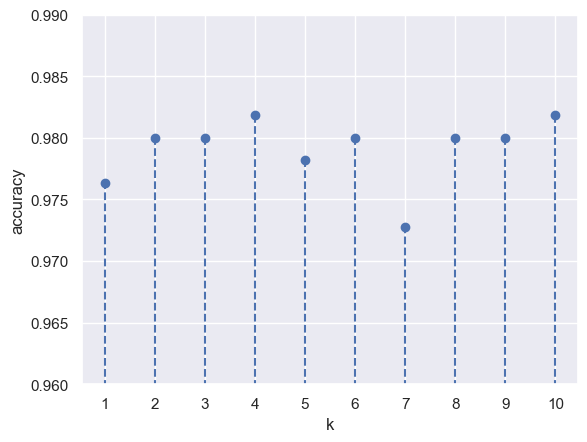

In [23]:
k_range = range(1,11)
scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train_scaled, y_train)
    scores.append(knn.score(X_test_scaled, y_test))

plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.vlines(k_range,0, scores, linestyle="dashed")
plt.ylim(0.96,0.99)
plt.xticks([i for i in range(1,11)]);

In practice, I would expect the error obtained as a result of hyperparameter optimization to be lower.

## Classification using Support Vector Classifer (SVC)
<hr>

In [24]:
from sklearn.svm import SVC

svc_linear = SVC(kernel = 'linear').fit(X_train_scaled, y_train)
print("Linear Kernel Accuracy: ",svc_linear.score(X_test_scaled,y_test))

svc_poly = SVC(kernel = 'rbf').fit(X_train_scaled, y_train)
print("Rbf Kernel Accuracy: ", svc_poly.score(X_test_scaled,y_test))

svc_poly = SVC(kernel = 'poly').fit(X_train_scaled, y_train)
print("Poly Kernel Accuracy: ", svc_poly.score(X_test_scaled,y_test))

Linear Kernel Accuracy:  0.9745454545454545
Rbf Kernel Accuracy:  0.9872727272727273
Poly Kernel Accuracy:  0.9890909090909091


In [25]:
# Comment added by Edanur to compare the best model performance
linear_accuracy = svc_linear.score(X_test_scaled, y_test) * 100
rbf_accuracy = svc_poly.score(X_test_scaled, y_test) * 100
poly_accuracy = svc_poly.score(X_test_scaled, y_test) * 100

### Let's try to increase SVC Linear model accuracy by parameter tuning.

**GridSearchCV can help us find the best parameters.**

In [26]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

parameters = {'C': np.logspace(-3, 2, 6).tolist(), 'gamma': np.logspace(-3, 2, 6).tolist()}
# 'degree': np.arange(0,5,1).tolist(), 'kernel':['linear','rbf','poly']

model = GridSearchCV(estimator = SVC(kernel="linear"), param_grid=parameters, n_jobs=-1, cv=4)
model.fit(X_train, y_train)

GridSearchCV(cv=4, estimator=SVC(kernel='linear'), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1.0, 10.0, 100.0],
                         'gamma': [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]})

The GridSearch method tries to select the best set of hyperparameters for a model by testing hyperparameter combinations within a certain range. With this method, the need to manually try many different hyperparameter combinations is eliminated, and the hyperparameter set that provides the best performance is automatically selected.

In [27]:
print(model.best_score_ )
print(model.best_params_ )

0.9866710547967747
{'C': 1.0, 'gamma': 0.001}


**POINTS TO BE HIGHLIGHTED**
1. *Interestingly liner kernel also gives satisfactory results but fine tuning increases the computation and might be inefficient in some cases*
2. *The accuracy can be increased in poly kernel by tweaking parameters but might lead to intensive overfitting.*
3. *RBF has better result than linear kernel.*
4. *Poly kernel so far wins by a small margin.*

## Classifying using decision tree
<hr>

In [28]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(random_state=42).fit(X_train, y_train)
clf.score(X_test,y_test)

0.9872727272727273

In [29]:
#Comment added by Edanur to compare the best model performance
desicion_tree_per = clf.score(X_test,y_test) * 100

### Let's visualize the import features which are taken into consideration by decision trees.

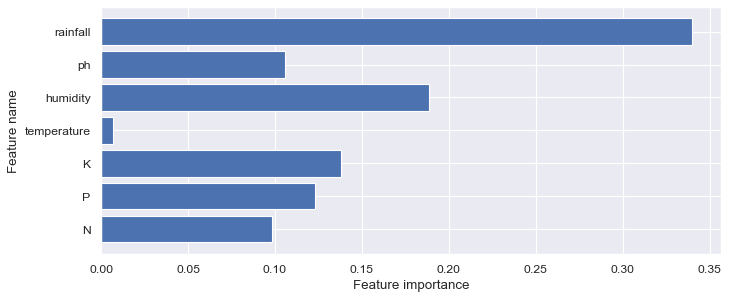

In [30]:
plt.figure(figsize=(10,4), dpi=80)
c_features = len(X_train.columns)
plt.barh(range(c_features), clf.feature_importances_)
plt.xlabel("Feature importance")
plt.ylabel("Feature name")
plt.yticks(np.arange(c_features), X_train.columns)
plt.show()

## Classification using Random Forest.
<hr>

In [31]:
'''
max depth and n_estimator are important to fine tune otherwise trees will be densely graphed which will be a classic case of overfitting. max_depth=4 and n_estimators=10 gives pretty much satisfying results by making sure model is able to generalize well.
'''

from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=4,n_estimators=100,random_state=42).fit(X_train, y_train)

print('RF Accuracy on training set: {:.2f}'.format(clf.score(X_train, y_train)))
print('RF Accuracy on test set: {:.2f}'.format(clf.score(X_test, y_test)))

RF Accuracy on training set: 0.97
RF Accuracy on test set: 0.97


In [32]:
#Comment added by Edanur to compare the best model performance
random_forest_per_train = clf.score(X_train,y_train) * 100
random_forest_per_test = clf.score(X_test,y_test) * 100

RF is the algorithm of choice for many machine learning tasks such as classification and regression due to its efficient results on high-dimensional datasets.

### <div style="color:blue;"><b> Classification report </b></div>

#### **Let's use <u>yellowbrick</u> for classification report as they are great for visualizing in a tabular format**

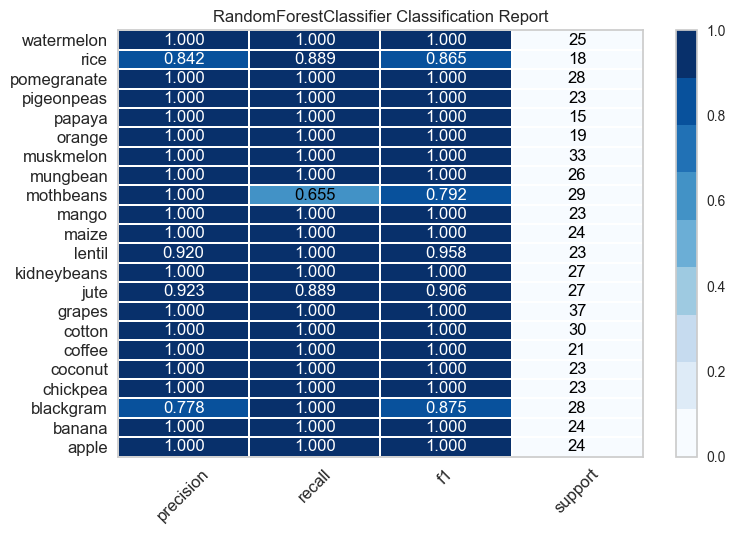

<AxesSubplot: title={'center': 'RandomForestClassifier Classification Report'}>

In [33]:
from yellowbrick.classifier import ClassificationReport
classes=list(targets.values())
visualizer = ClassificationReport(clf, classes=classes, support=True,cmap="Blues")

visualizer.fit(X_train, y_train)  # Fit the visualizer and the model
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()

These metrics are used to measure the performance of the model on different class labels.

"Support" refers to the number of instances that the model correctly predicts for each class label in classification problems.

## Classification using Gradient Boosting
<hr>

In [34]:
from sklearn.ensemble import GradientBoostingClassifier
grad = GradientBoostingClassifier().fit(X_train, y_train)
print('Gradient Boosting accuracy : {}'.format(grad.score(X_test,y_test)))

Gradient Boosting accuracy : 0.9945454545454545


In [35]:
#Comment added by Edanur to compare the best model performance
accuracy_grad = grad.score(X_test, y_test) * 100

# Which is the best Model ?

In [36]:
results = pd.DataFrame({
    'Model': ['KNN', 'Linear Kernel', 'RBF Kernel', 'Poly Kernel',
             'Desicion Tree', 'Gradient Boosting', 'RF training set', 
             'RF test set'],
    'Score': [per_knn,linear_accuracy, rbf_accuracy, poly_accuracy, 
              desicion_tree_per, accuracy_grad, random_forest_per_train, 
              random_forest_per_test ]})
result_df = results.sort_values(by='Score', ascending=False)
result_df['Score'] = result_df['Score'].apply(lambda x: "{:.2f}%".format(x))
result_df = result_df.set_index('Score')
result_df.head(9)

,Model
Score,
99.45%,Gradient Boosting
98.91%,RBF Kernel
98.91%,Poly Kernel
98.73%,Desicion Tree
97.82%,KNN
97.45%,Linear Kernel
97.27%,RF test set
97.15%,RF training set


A we can see, the Gradient Boosting Classifier model achieved an accuracy of 99.27% on the test set, indicating that it is a highly effective model for the given task.